Found 10901 files belonging to 6 classes.
Found 2698 files belonging to 6 classes.


/tmp/ipykernel_30/5517672.py:42: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(150, 150, 3))


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/5


I0000 00:00:1729256923.400855     136 service.cc:145] XLA service 0x7d69d0017ad0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1729256923.400902     136 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1729256923.400906     136 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


  6/171 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - accuracy: 0.2148 - loss: 9.3012   

I0000 00:00:1729256930.315020     136 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


171/171 ━━━━━━━━━━━━━━━━━━━━ 70s 130ms/step - accuracy: 0.4236 - loss: 2.7590 - val_accuracy: 0.6549 - val_loss: 0.8602
Epoch 2/5
171/171 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.5329 - loss: 1.0643 - val_accuracy: 0.7302 - val_loss: 0.7079
Epoch 3/5
171/171 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.5924 - loss: 0.9268 - val_accuracy: 0.7368 - val_loss: 0.6252
Epoch 4/5
171/171 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.6103 - loss: 0.8692 - val_accuracy: 0.8547 - val_loss: 0.5910
Epoch 5/5
171/171 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.6375 - loss: 0.8179 - val_accuracy: 0.8621 - val_loss: 0.5909
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.8596 - loss: 0.5980
Test Accuracy: 86.21%


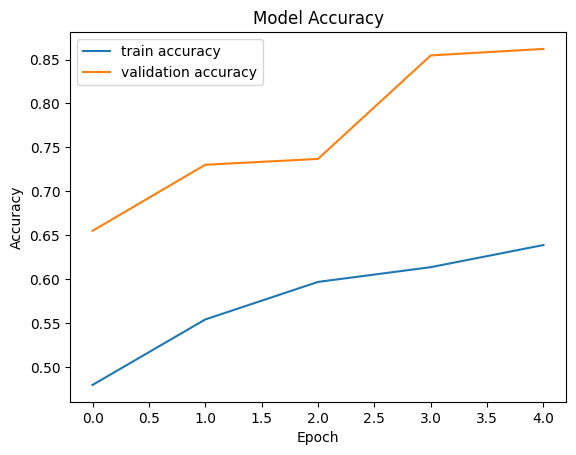

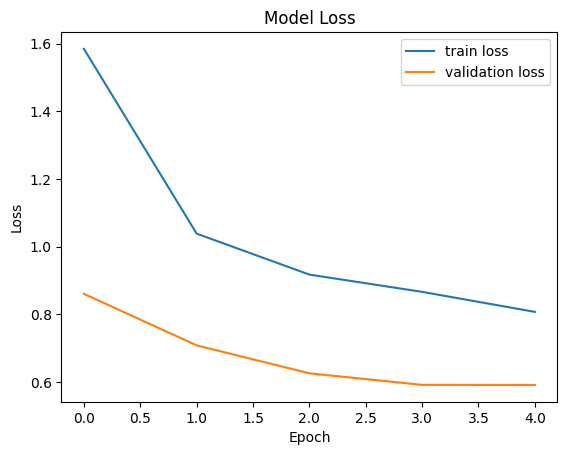

In [2]:
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

# Enable GPU Acceleration (already done in Kaggle settings)

# Define paths
dataset_path = '/kaggle/input/fruits-fresh-and-rotten-for-classification/'
train_data_dir = os.path.join(dataset_path, 'dataset/train/')
test_data_dir = os.path.join(dataset_path, 'dataset/test/')

# Use tf.data.Dataset for loading and preprocessing the images
BATCH_SIZE = 64
IMG_SIZE = (150, 150)

def load_dataset(data_dir):
    dataset = tf.keras.preprocessing.image_dataset_from_directory(
        data_dir,
        image_size=IMG_SIZE,
        batch_size=BATCH_SIZE,
        label_mode='categorical',  # Change to categorical for multi-class
        shuffle=True
    )
    return dataset

# Load train and test datasets using tf.data.Dataset
train_dataset = load_dataset(train_data_dir)
test_dataset = load_dataset(test_data_dir)

# Apply optimizations
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_dataset = train_dataset.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.cache().prefetch(buffer_size=AUTOTUNE)

# Use MobileNetV2 pre-trained model as the base
def create_model():
    base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
    base_model.trainable = False  # Freeze the base model layers for transfer learning

    model = Sequential([
        base_model,
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(6, activation='softmax')  # For six classes
    ])
    return model

# Create and compile the model
model = create_model()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model with tf.data.Dataset
history = model.fit(
    train_dataset,
    epochs=5,  # Reduced number of epochs for quicker testing
    validation_data=test_dataset
)

# Save the trained model
model.save('/kaggle/working/my_fruit_classifier.h5')

# Evaluate the model
loss, accuracy = model.evaluate(test_dataset)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Plot training history
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()


# To test your trained model on a single image, you can follow these steps:
* Load the image.
* Preprocess the image to match the input shape and format expected by your model.
* Make a prediction using the model.
* Interpret the results.

Found 10901 files belonging to 6 classes.


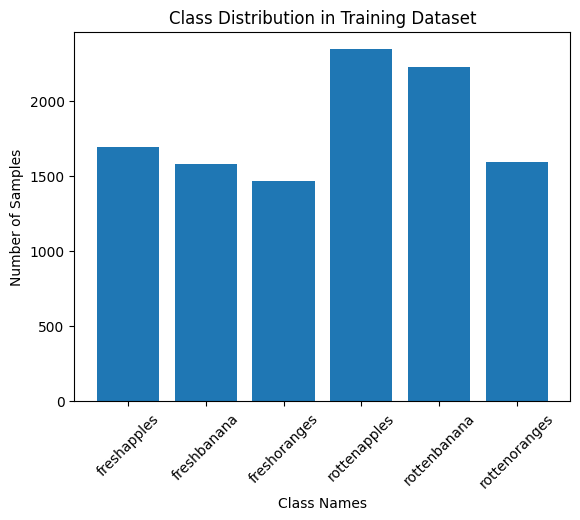

In [12]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Define paths
dataset_path = '/kaggle/input/fruits-fresh-and-rotten-for-classification/'
train_data_dir = os.path.join(dataset_path, 'dataset/train/')

# Load train dataset using tf.data.Dataset
BATCH_SIZE = 64
IMG_SIZE = (150, 150)

def load_dataset(data_dir):
    dataset = tf.keras.preprocessing.image_dataset_from_directory(
        data_dir,
        image_size=IMG_SIZE,
        batch_size=BATCH_SIZE,
        label_mode='categorical',  # Use categorical for multi-class
        shuffle=True
    )
    return dataset

# Load the train dataset
train_dataset = load_dataset(train_data_dir)

# Get class names
class_names = train_dataset.class_names
class_counts = np.zeros(len(class_names))

# Count samples for each class
for images, labels in train_dataset:
    for label in labels.numpy():
        class_counts[np.argmax(label)] += 1

# Plotting class distribution
plt.bar(class_names, class_counts)
plt.xlabel('Class Names')
plt.ylabel('Number of Samples')
plt.title('Class Distribution in Training Dataset')
plt.xticks(rotation=45)
plt.show()


Found 10901 files belonging to 6 classes.
Found 2698 files belonging to 6 classes.
Found 8723 images belonging to 6 classes.
Found 2178 images belonging to 6 classes.


/tmp/ipykernel_30/2600474680.py:80: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(150, 150, 3))


Epoch 1/15


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


137/137 ━━━━━━━━━━━━━━━━━━━━ 131s 863ms/step - accuracy: 0.4293 - loss: 1.6353 - val_accuracy: 0.6956 - val_loss: 0.7860
Epoch 2/15
137/137 ━━━━━━━━━━━━━━━━━━━━ 113s 792ms/step - accuracy: 0.5928 - loss: 1.0252 - val_accuracy: 0.7489 - val_loss: 0.6749
Epoch 3/15
137/137 ━━━━━━━━━━━━━━━━━━━━ 113s 794ms/step - accuracy: 0.6646 - loss: 0.8833 - val_accuracy: 0.7622 - val_loss: 0.6464
Epoch 4/15
137/137 ━━━━━━━━━━━━━━━━━━━━ 114s 800ms/step - accuracy: 0.6656 - loss: 0.8792 - val_accuracy: 0.7952 - val_loss: 0.5808
Epoch 5/15
137/137 ━━━━━━━━━━━━━━━━━━━━ 130s 911ms/step - accuracy: 0.6806 - loss: 0.8351 - val_accuracy: 0.8049 - val_loss: 0.5324
Epoch 6/15
137/137 ━━━━━━━━━━━━━━━━━━━━ 113s 792ms/step - accuracy: 0.6955 - loss: 0.7949 - val_accuracy: 0.8021 - val_loss: 0.5476
Epoch 7/15
137/137 ━━━━━━━━━━━━━━━━━━━━ 113s 791ms/step - accuracy: 0.7023 - loss: 0.7567 - val_accuracy: 0.8030 - val_loss: 0.5351
Epoch 8/15
137/137 ━━━━━━━━━━━━━━━━━━━━ 115s 810ms/step - accuracy: 0.7141 - loss: 0.76

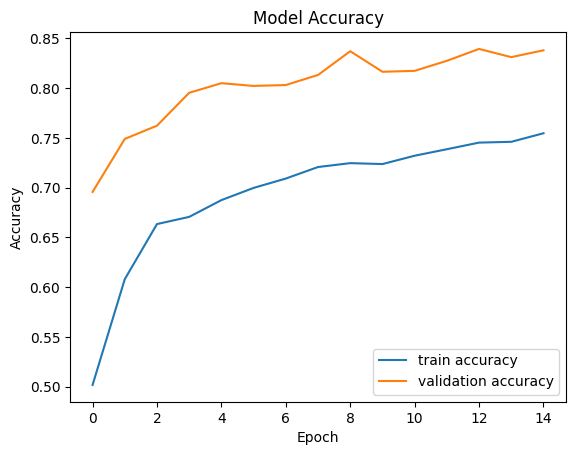

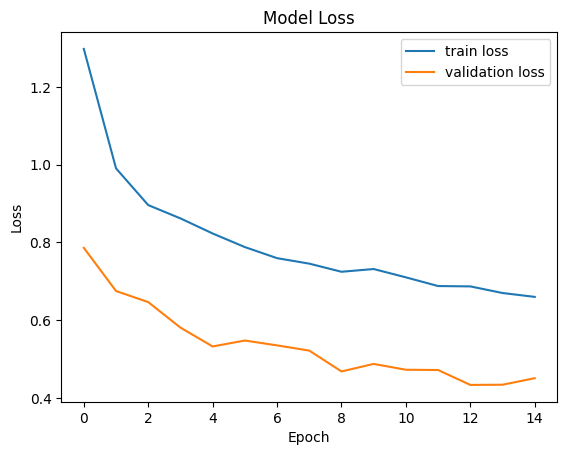

In [14]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

# Define paths
dataset_path = '/kaggle/input/fruits-fresh-and-rotten-for-classification/'
train_data_dir = os.path.join(dataset_path, 'dataset/train/')
test_data_dir = os.path.join(dataset_path, 'dataset/test/')

# Use tf.data.Dataset for loading and preprocessing the images
BATCH_SIZE = 64
IMG_SIZE = (150, 150)

# Load dataset function
def load_dataset(data_dir):
    dataset = tf.keras.preprocessing.image_dataset_from_directory(
        data_dir,
        image_size=IMG_SIZE,
        batch_size=BATCH_SIZE,
        label_mode='categorical',
        shuffle=True
    )
    return dataset

# Load train and test datasets
train_dataset = load_dataset(train_data_dir)
test_dataset = load_dataset(test_data_dir)

# Count class samples for class weights
class_names = train_dataset.class_names
class_counts = np.zeros(len(class_names))

for images, labels in train_dataset:
    for label in labels.numpy():
        class_counts[np.argmax(label)] += 1

# Calculate class weights
total_samples = sum(class_counts)
class_weights = {i: total_samples / (len(class_names) * count) for i, count in enumerate(class_counts)}

# Enhanced Data Augmentation
data_augmentation = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # Use a portion of the data for validation
)

# Create training and validation datasets with augmentation
train_dataset = data_augmentation.flow_from_directory(
    train_data_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

validation_dataset = data_augmentation.flow_from_directory(
    train_data_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

# Use MobileNetV2 pre-trained model as the base
def create_model():
    base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
    base_model.trainable = False  # Freeze the base model layers for transfer learning

    model = Sequential([
        base_model,
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(len(class_names), activation='softmax')  # Number of classes
    ])
    return model

# Create and compile the model
model = create_model()
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),  # Lower learning rate
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Early Stopping Callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(
    train_dataset,
    epochs=15,  # Adjust number of epochs
    validation_data=validation_dataset,
    class_weight=class_weights,
    callbacks=[early_stopping]
)

# Save the trained model
model.save('/kaggle/working/my_fruit_classifier.h5')

# Evaluate the model
loss, accuracy = model.evaluate(test_dataset)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Plot training history
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


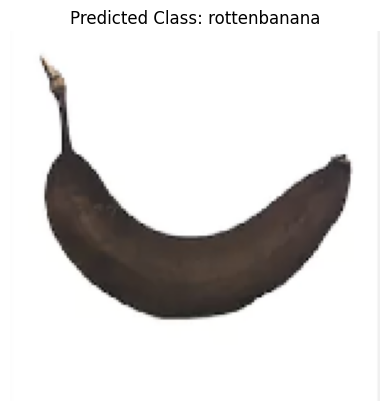

Prediction Values: [[8.2975951e-16 6.1161614e-07 1.9672210e-11 1.1710500e-12 9.9999940e-01
  1.0109515e-08]]


In [15]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Function to load and preprocess the image
def load_and_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(150, 150))  # Resize the image
    img_array = image.img_to_array(img)  # Convert to array
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = preprocess_input(img_array)  # Apply MobileNetV2 preprocessing
    return img_array

# Function to predict the class of an image
def predict_image(model, img_path):
    img_array = load_and_preprocess_image(img_path)
    predictions = model.predict(img_array)
    predicted_class_index = np.argmax(predictions[0])  # Get the class index
    predicted_class_name = train_dataset.class_indices  # Get class names
    predicted_class_name = list(predicted_class_name.keys())[list(predicted_class_name.values()).index(predicted_class_index)]
    return predicted_class_name, predictions

# Path to the image you want to test
test_image_path = '/kaggle/input/fruits-fresh-and-rotten-for-classification/dataset/test/rottenbanana/Screen Shot 2018-06-12 at 8.51.00 PM.png'  # Change this to your image path

# Make the prediction
predicted_class, prediction_values = predict_image(model, test_image_path)

# Display the image and the prediction
plt.imshow(image.load_img(test_image_path, target_size=(150, 150)))
plt.axis('off')
plt.title(f'Predicted Class: {predicted_class}')
plt.show()

print(f'Prediction Values: {prediction_values}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


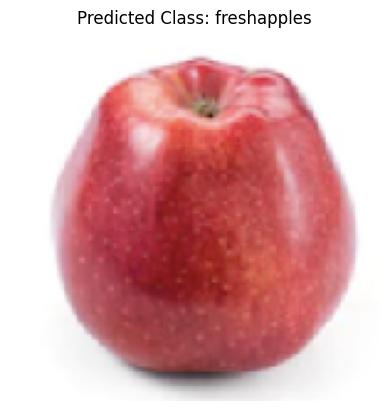

freshapples: 0.0000
freshbanana: 0.0001
freshoranges: 0.0004
rottenapples: 0.0016
rottenoranges: 0.0237
rottenbanana: 0.9742


In [23]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

# Function to load and preprocess the image
def load_and_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(150, 150))  # Resize the image
    img_array = image.img_to_array(img)  # Convert to array
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = preprocess_input(img_array)  # Apply MobileNetV2 preprocessing
    return img_array

# Function to predict the class of an image
def predict_image(model, img_path):
    img_array = load_and_preprocess_image(img_path)
    predictions = model.predict(img_array)
    # Get the indices of the top two predictions
    top_indices = np.argsort(predictions[0])[-6:]  # Get indices of top 2 predictions
    predicted_class_name = [list(train_dataset.class_indices.keys())[i] for i in top_indices]  # Get class names
    predicted_probabilities = predictions[0][top_indices]  # Get probabilities of the top 2 classes
    return predicted_class_name, predicted_probabilities

# Path to the image you want to test
test_image_path = '/kaggle/input/fruits-fresh-and-rotten-for-classification/dataset/test/freshapples/Screen Shot 2018-06-08 at 5.09.31 PM.png'  # Change this to your image path

# Make the prediction
predicted_classes, prediction_values = predict_image(model, test_image_path)

# Display the image and the predictions
plt.imshow(image.load_img(test_image_path, target_size=(150, 150)))
plt.axis('off')
plt.title(f'Predicted Class: {predicted_classes[0]}')  # Display the second highest class
plt.show()

# Display the prediction values for the top 2 classes
for class_name, value in zip(predicted_classes, prediction_values):
    print(f"{class_name}: {value:.4f}")



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


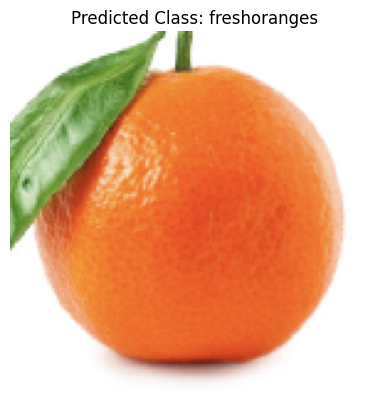

freshapples: 0.0001
freshoranges: 0.0003
freshbanana: 0.0012
rottenapples: 0.0019
rottenoranges: 0.1650
rottenbanana: 0.8314


In [25]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

# Function to load and preprocess the image
def load_and_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(150, 150))  # Resize the image
    img_array = image.img_to_array(img)  # Convert to array
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = preprocess_input(img_array)  # Apply MobileNetV2 preprocessing
    return img_array

# Function to predict the class of an image
def predict_image(model, img_path):
    img_array = load_and_preprocess_image(img_path)
    predictions = model.predict(img_array)
    # Get the indices of the top two predictions
    top_indices = np.argsort(predictions[0])[-6:]  # Get indices of top 2 predictions
    predicted_class_name = [list(train_dataset.class_indices.keys())[i] for i in top_indices]  # Get class names
    predicted_probabilities = predictions[0][top_indices]  # Get probabilities of the top 2 classes
    return predicted_class_name, predicted_probabilities

# Path to the image you want to test
test_image_path = '/kaggle/input/fruits-fresh-and-rotten-for-classification/dataset/test/freshoranges/Screen Shot 2018-06-13 at 12.00.06 AM.png'  # Change this to your image path

# Make the prediction
predicted_classes, prediction_values = predict_image(model, test_image_path)

# Display the image and the predictions
plt.imshow(image.load_img(test_image_path, target_size=(150, 150)))
plt.axis('off')
plt.title(f'Predicted Class: {predicted_classes[1]}')  # Display the second highest class
plt.show()

# Display the prediction values for the top 2 classes
for class_name, value in zip(predicted_classes, prediction_values):
    print(f"{class_name}: {value:.4f}")

